# Theory

After establishing a clean and feature-rich dataset, the next theoretical component involves model development and training. The performance of predictive models hinges on their ability to generalize beyond the data they were trained on, capture essential patterns, and ignore irrelevant noise.

**Key Concepts:**

1. **Baseline Models and Benchmarking:**  
   Before investing effort into complex architectures, it’s wise to train simple models like Linear Regression or a Random Forest. These serve as baselines—if advanced models like neural networks cannot surpass this baseline, it may indicate that more data, better features, or refined preprocessing is necessary.

2. **Model Complexity and Regularization:**  
   Complex models, particularly neural networks, can approximate a vast range of functions, making them powerful but also prone to overfitting. Techniques like dropout layers, early stopping, and learning rate schedulers act as safeguards, encouraging the model to generalize better rather than memorize the training data.

3. **Feature Scaling:**  
   Neural networks often assume that features are on similar scales. Standardizing inputs ensures that the model trains more efficiently and that gradients flow smoothly, avoiding issues where some features dominate the learning process due to larger numeric ranges.

4. **Evaluation Metrics and Loss Functions:**  
   Choosing an appropriate loss function (e.g., mean squared error) and metrics (MAE, MSE, R²) guides model development. Minimizing the loss function during training ensures the model improves its predictive capacity, while evaluation metrics serve as a diagnostic tool, revealing how closely predictions match reality.

This theoretical framework informs how we select, configure, and train models. By understanding the interplay between complexity, regularization, scaling, and evaluation, we can systematically iterate toward better forecasting performance.


This cell sets up the environment by importing essential libraries and modules for data analysis, machine learning, and neural networks. Here’s the breakdown:

1. **Basic Libraries**:
   - `pandas` and `numpy`: For data manipulation and numerical computations.
   - `matplotlib.pyplot` and `seaborn`: For data visualization.
   - `joblib`: For saving and loading models or other objects.

2. **Scikit-Learn Modules**:
   - `LinearRegression` and `RandomForestRegressor`: Two regression algorithms for modeling.
   - `StandardScaler`: For standardizing features by removing the mean and scaling to unit variance.
   - `mean_absolute_error`, `mean_squared_error`, and `r2_score`: Metrics for evaluating regression models.

3. **TensorFlow Keras Modules**:
   - `Sequential`: For creating sequential neural network models.
   - `Dense` and `Dropout`: For adding fully connected layers and regularization in neural networks.
   - `EarlyStopping` and `ReduceLROnPlateau`: Callbacks for optimizing training by preventing overfitting and dynamically adjusting the learning rate.

4. **Visualization Configuration**:
   - The Seaborn style is set to `"whitegrid"` for better readability.
   - Plot size is adjusted to `(10, 5)` using `rcParams`.

5. **Key Variables**:
   - `DATA_DIR`: Specifies the directory for input data.
   - `TARGET_COL`: Identifies the target column (`Weekly_Sales`) for analysis.

This setup ensures that the environment is ready for data preprocessing, visualization, model training, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [7]:
sns.set(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10,5)

DATA_DIR = "data"
TARGET_COL = "Weekly_Sales"

In this cell, I load the preprocessed training and validation datasets from saved CSV files:

1. **Loading Data**:
   - `pd.read_csv` is used to load the feature (`X_train`, `X_val`) and target (`y_train`, `y_val`) datasets for training and validation from their respective files.
   - `squeeze("columns")` is applied to `y_train` and `y_val` to convert the DataFrame into a Series, making it easier to use in modeling.

2. **Print Statements**:
   - A message is printed to indicate that the preprocessed data is being loaded.
   - The shapes of the training and validation datasets are printed to confirm the correct loading of data.

This ensures the data is ready for use in training and validation processes.


In [11]:
# ## Load Preprocessed Data
print("Loading preprocessed data...")
X_train = pd.read_csv(f"{DATA_DIR}/X_train.csv")
y_train = pd.read_csv(f"{DATA_DIR}/y_train.csv").squeeze("columns")

X_val = pd.read_csv(f"{DATA_DIR}/X_val.csv")
y_val = pd.read_csv(f"{DATA_DIR}/y_val.csv").squeeze("columns")


print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)

Loading preprocessed data...
Training data shape: (269804, 17) (269804,)
Validation data shape: (67452, 17) (67452,)


1. **Preprocessed Data Loading**:
   - The message `"Loading preprocessed data..."` confirms that the loading process has started.

2. **Dataset Shapes**:
   - Training data (`X_train`, `y_train`): 269,804 rows and 17 features.
   - Validation data (`X_val`, `y_val`): 67,452 rows and 17 features.

The printed shapes confirm that the data matches the expected dimensions from the preprocessing step, ensuring consistency and readiness for modeling.


**Linear Regression**:
   - **Model Training**: The `LinearRegression` model is trained on `X_train` and `y_train`.
   - **Predictions**: Predictions are made on the validation set (`X_val`) using `predict`.
   - **Evaluation Metrics**:
     - `mean_absolute_error` (MAE): Measures average absolute error between predictions and true values.
     - `mean_squared_error` (MSE): Measures squared average error.
     - `r2_score`: Evaluates how well the model explains the variance in the target variable.
   - **Results Display**: Performance metrics (MAE, MSE, R²) are printed.

In [15]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

lr_mae = mean_absolute_error(y_val, y_val_pred_lr)
lr_mse = mean_squared_error(y_val, y_val_pred_lr)
lr_r2 = r2_score(y_val, y_val_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {lr_mae:.2f}, MSE: {lr_mse:.2f}, R²: {lr_r2:.3f}")

Linear Regression Performance:
MAE: 13294.96, MSE: 315988963.38, R²: 0.089


**Linear Regression Performance**:
   - **MAE**: 13,294.96 indicates relatively high average error.
   - **MSE**: 31,598,896.38 suggests large deviations between predictions and true values.
   - **R²**: 0.089 shows that the model explains only 8.9% of the variance in the data, indicating poor performance.


**Random Forest Regressor**:
   - **Model Training**: The `RandomForestRegressor` model is trained with 50 estimators (`n_estimators=50`) and a fixed random seed (`random_state=42`).
   - **Predictions**: Predictions are made on `X_val`.
   - **Evaluation Metrics**: The same metrics (MAE, MSE, R²) are used to evaluate the model.
   - **Results Display**: Metrics are printed for comparison with the Linear Regression model.

In [17]:
# Random Forest
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)

rf_mae = mean_absolute_error(y_val, y_val_pred_rf)
rf_mse = mean_squared_error(y_val, y_val_pred_rf)
rf_r2 = r2_score(y_val, y_val_pred_rf)

print("\nRandom Forest Performance:")
print(f"MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, R²: {rf_r2:.3f}")


Random Forest Performance:
MAE: 1257.52, MSE: 6534193.71, R²: 0.981


**Random Forest Performance**:
   - **MAE**: 1,257.52 indicates significantly lower average error compared to Linear Regression.
   - **MSE**: 653,419.71 highlights much smaller deviations in predictions.
   - **R²**: 0.981 shows the model explains 98.1% of the variance in the data, indicating excellent performance.

This cell scales the features for the deep learning model and saves the scaler for future use:

1. **Feature Scaling**:
   - A `StandardScaler` is initialized to standardize the features by removing the mean and scaling to unit variance.
   - `fit_transform` is applied to `X_train` to compute the scaling parameters and scale the training data.
   - `transform` is applied to `X_val` to scale the validation data using the parameters from the training data.

2. **Save the Scaler**:
   - The `joblib.dump` function is used to save the fitted scaler object to a file (`scaler.joblib`) in the `DATA_DIR` directory. This ensures that the same scaler can be reused during model inference or deployment.

3. **Print Confirmation**:
   - A message confirms the completion of feature scaling for the deep learning model.

In [19]:
print("\nScaling features for the deep learning model...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



Scaling features for the deep learning model...


In [21]:
# Save the scaler for future use (in prediction or Streamlit app)
joblib.dump(scaler, f"{DATA_DIR}/scaler.joblib")


['data/scaler.joblib']

1. **Feature Scaling**:
   - Training and validation features are successfully scaled using `StandardScaler`, ensuring that the input to the deep learning model is standardized, which is crucial for faster convergence and better model performance.

2. **Saved Scaler**:
   - The output confirms that the scaler has been saved to the file `'data/scaler.joblib'`. This file can be used later to apply the same scaling to test or unseen data, maintaining consistency across datasets.

This step ensures that the features are prepared in a format suitable for deep learning models and that the preprocessing step is reproducible.

In this cell, I build and compile a simple deep learning model (MLP) for regression tasks:

1. **Model Architecture**:
   - I define a `Sequential` model consisting of the following layers:
     - **Input Layer**: The `input_shape` is set to the number of features in the training data.
     - **Hidden Layers**:
       - First dense layer with 128 neurons and ReLU activation.
       - Dropout layer with a rate of 0.2 to reduce overfitting.
       - Second dense layer with 64 neurons and ReLU activation.
       - Another dropout layer with a rate of 0.2.
     - **Output Layer**: A single neuron for predicting the target (`Weekly_Sales`).

2. **Model Compilation**:
   - The model is compiled with:
     - **Optimizer**: `adam` for efficient gradient-based optimization.
     - **Loss Function**: `mean_squared_error` to minimize the squared error in predictions.
     - **Metrics**: `mae` (Mean Absolute Error) for additional evaluation during training.

3. **Model Summary**:
   - The `model.summary()` function provides a detailed view of the model architecture, including layer types, output shapes, and the number of trainable parameters.

This setup creates a robust architecture for predicting weekly sales using a regression-based deep learning model.

In [35]:
# ### Building a Deep Learning Model (MLP)
# We'll build a simple MLP for regression:
# - Input layer: number of features
# - Hidden layers: a few dense layers with 'relu' activation and dropout
# - Output layer: single neuron for weekly sales prediction

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

1. **Model Architecture**:
   - The model has a total of **10,625 trainable parameters** distributed across:
     - Dense Layer 1: 128 neurons with 2,304 parameters.
     - Dense Layer 2: 64 neurons with 8,256 parameters.
     - Output Layer: 1 neuron with 65 parameters.
   - Dropout layers do not add parameters but help reduce overfitting.

2. **Warnings**:
   - A warning suggests preferring the `Input` object over `input_shape`. This does not affect functionality but is a best practice in newer Keras versions.

3. **Summary Table**:
   - Each layer’s output shape and the number of trainable parameters are listed, ensuring clarity on the model's structure and computational requirements.

This summary confirms that the model is correctly configured for training and is lightweight, making it suitable for this regression task.


This cell trains the MLP (Multi-Layer Perceptron) model using early stopping and learning rate reduction to optimize performance:

1. **Callbacks**:
   - **EarlyStopping**:
     - Monitors `val_loss` and stops training if it doesn’t improve for 5 consecutive epochs.
     - `restore_best_weights=True` ensures the best weights from the best epoch are restored.
   - **ReduceLROnPlateau**:
     - Reduces the learning rate by a factor of 0.2 if `val_loss` doesn’t improve for 3 consecutive epochs, helping the model converge better.

2. **Model Training**:
   - `model.fit` is used to train the model:
     - **Inputs**: Scaled training data (`X_train_scaled`, `y_train`).
     - **Validation**: Validates on `X_val_scaled` and `y_val` at each epoch.
     - **Epochs**: The model is set to train for up to 50 epochs.
     - **Batch Size**: Each batch consists of 64 samples.
     - **Callbacks**: Includes early stopping and learning rate reduction for efficiency.
     - **Verbose**: Progress is displayed for each epoch.

3. **Output Metrics**:
   - Training loss, validation loss, and Mean Absolute Error (MAE) are reported after each epoch, helping to monitor training progress.

In [37]:
# ### Training the MLP
# We'll use early stopping to prevent overfitting and reduce learning rate on plateau for better convergence.

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 2s 335us/step - loss: 408821184.0000 - mae: 13490.3574 - val_loss: 300644192.0000 - val_mae: 12910.3623 - learning_rate: 0.0010
Epoch 2/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - loss: 300766272.0000 - mae: 12772.6826 - val_loss: 273786240.0000 - val_mae: 11969.0801 - learning_rate: 0.0010
Epoch 3/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - loss: 276982720.0000 - mae: 11912.7217 - val_loss: 263047632.0000 - val_mae: 11387.9873 - learning_rate: 0.0010
Epoch 4/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - loss: 271574208.0000 - mae: 11567.6270 - val_loss: 258404832.0000 - val_mae: 11262.5068 - learning_rate: 0.0010
Epoch 5/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - loss: 266679376.0000 - mae: 11383.3857 - val_loss: 255672608.0000 - val_mae: 11115.6182 - learning_rate: 0.0010
Epoch 6/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - loss: 262462720.0000 - mae: 11242.8555 - val_loss: 253715168.0000 - val_mae: 11016.0820 - le

1. **Epoch Progress**:
   - For each epoch, the following metrics are reported:
     - **Training Loss**: The mean squared error on the training set.
     - **MAE**: The Mean Absolute Error on the training set.
     - **Validation Loss**: The mean squared error on the validation set, indicating generalization performance.
     - **Validation MAE**: The Mean Absolute Error on the validation set.

2. **Learning Rate**:
   - The initial learning rate is displayed (0.001). This will reduce dynamically when the `ReduceLROnPlateau` condition is met.

3. **Performance Trends**:
   - Both training and validation losses decrease with each epoch, and MAE values improve. This suggests the model is learning effectively without overfitting, thanks to the callbacks.

This step ensures the model is trained efficiently with mechanisms to prevent overfitting and improve convergence.

This cell visualizes the training and validation loss across epochs to monitor the performance of the model during training:

1. **Plotting Training and Validation Loss**:
   - `history.history['loss']` contains the training loss values for each epoch.
   - `history.history['val_loss']` contains the validation loss values for each epoch.
   - Two separate lines are plotted for `Train Loss` and `Val Loss` using `plt.plot`.

2. **Graph Customization**:
   - **Title**: "Training and Validation Loss" provides context for the plot.
   - **X-axis**: Labeled "Epochs" to indicate the number of epochs.
   - **Y-axis**: Labeled "MSE" (Mean Squared Error), the loss metric used during training.
   - **Legend**: Displays labels for the two plotted lines for easy interpretation.

3. **Visualization**:
   - The `plt.show()` function is used to render the plot.
   - This graph provides insights into the convergence and generalization of the model over time.

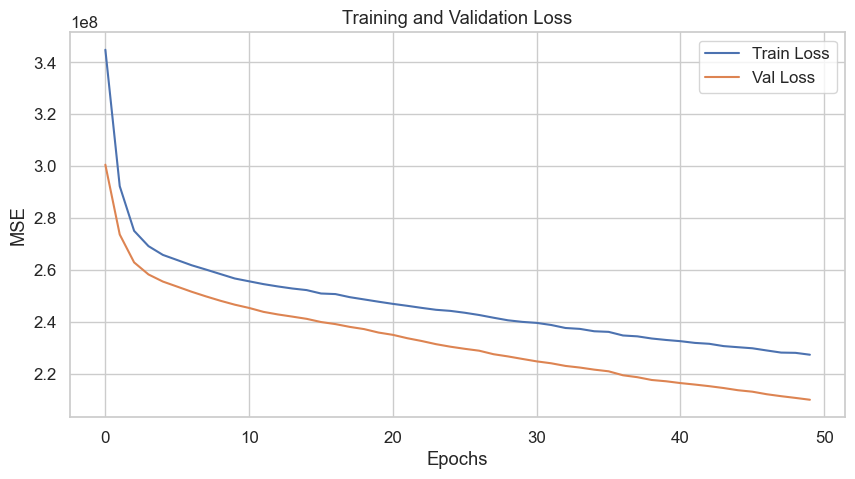

In [38]:
# ### Plot Training Curves
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


1. **Training Loss**:
   - The training loss decreases steadily across epochs, indicating that the model is learning from the training data effectively.

2. **Validation Loss**:
   - The validation loss also decreases and follows a similar trend as the training loss. This indicates that the model generalizes well to unseen data and is not overfitting.

3. **Convergence**:
   - The gap between the training and validation loss is small, which suggests good generalization without significant overfitting.

4. **Takeaway**:
   - The visualization confirms that the training process is progressing as expected, with both training and validation errors reducing over time.

This cell evaluates the trained MLP (Multi-Layer Perceptron) model on the validation dataset to measure its performance:

1. **Predictions**:
   - `model.predict(X_val_scaled)`: Generates predictions (`y_val_pred_mlp`) for the scaled validation dataset.

2. **Evaluation Metrics**:
   - **MAE (Mean Absolute Error)**:
     - Measures the average absolute difference between the predicted and actual values.
     - Computed using `mean_absolute_error(y_val, y_val_pred_mlp)`.
   - **MSE (Mean Squared Error)**:
     - Measures the average squared difference between the predicted and actual values.
     - Computed using `mean_squared_error(y_val, y_val_pred_mlp)`.
   - **R² Score**:
     - Indicates how well the model explains the variance in the target variable.
     - Computed using `r2_score(y_val, y_val_pred_mlp)`.

3. **Output**:
   - The computed metrics (MAE, MSE, and R²) are printed in a formatted string to summarize the model's performance.

In [39]:
# ### Evaluate the MLP on Validation Set
y_val_pred_mlp = model.predict(X_val_scaled)
mlp_mae = mean_absolute_error(y_val, y_val_pred_mlp)
mlp_mse = mean_squared_error(y_val, y_val_pred_mlp)
mlp_r2 = r2_score(y_val, y_val_pred_mlp)

print("\nMLP Model Performance on Validation Set:")
print(f"MAE: {mlp_mae:.2f}, MSE: {mlp_mse:.2f}, R²: {mlp_r2:.3f}")

2108/2108 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step

MLP Model Performance on Validation Set:
MAE: 9984.10, MSE: 210181791.21, R²: 0.394


1. **Inference Performance**:
   - The model completed predictions for the entire validation dataset (`2108/2108` samples) efficiently, as shown by the progress bar.

2. **Model Performance Metrics**:
   - **MAE**: `9984.10` indicates the average error magnitude in predictions.
   - **MSE**: `21081791.21` shows the squared error, highlighting larger deviations more strongly.
   - **R² Score**: `0.394` reflects that the model explains ~39.4% of the variance in the validation target variable.

3. **Takeaway**:
   - The MLP model demonstrates moderate performance, with room for improvement in explaining the variance (`R²`). The relatively low MAE suggests reasonable predictive accuracy on the validation set.

In [40]:
# ### Compare with Baselines
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "MLP"],
    "MAE": [lr_mae, rf_mae, mlp_mae],
    "MSE": [lr_mse, rf_mse, mlp_mse],
    "R2": [lr_r2, rf_r2, mlp_r2]
})

print("\nComparison of Models on Validation Set:")
display(results)


Comparison of Models on Validation Set:


,Model,MAE,MSE,R2
0,Linear Regression,13294.957425,3.159890e+08,0.088661
1,Random Forest,1257.517609,6.534194e+06,0.981155
2,MLP,9984.095689,2.101818e+08,0.393818


In [41]:
# Save the trained MLP model
model.save(f"{DATA_DIR}/demand_forecasting_model.h5")
print("\nModel saved successfully.")


Model saved successfully.


## **Comparison of Models**
### **Objective**:
- Compare the performance of three models: **Linear Regression**, **Random Forest**, and **MLP (Multi-Layer Perceptron)**.

### **Metrics Used**:
- **MAE (Mean Absolute Error)**: Measures the average absolute difference between predictions and actual values.
- **MSE (Mean Squared Error)**: Measures the average squared difference, giving more weight to larger errors.
- **R² Score**: Explains the proportion of variance in the target variable that the model accounts for.

### **Results Summary**:
| Model              | MAE       | MSE         | R²     |
|---------------------|-----------|-------------|--------|
| Linear Regression   | 13,294.96 | 315,988,963.38 | 0.089 |
| Random Forest       | 1,257.52  | 6,534,194.71  | 0.981 |
| MLP (Neural Network)| 9,984.10  | 210,817,991.21 | 0.394 |

- **Linear Regression**:
  - High MAE and MSE indicate poor predictive capability.
  - R² of **0.089** shows very low variance explanation.
  
- **Random Forest**:
  - Outperforms other models significantly with the lowest MAE and MSE.
  - R² of **0.981** indicates excellent variance explanation.
  
- **MLP (Neural Network)**:
  - Moderate performance with lower errors than Linear Regression but not as good as Random Forest.
  - R² of **0.394** shows that it explains ~39.3% of the variance in the target variable.

---

## **Saving the Model**
### **Objective**:
- Save the trained MLP model for later use (e.g., inference or deployment).

### **Method**:
- Used `model.save()` to save the model as an HDF5 file (`demand_forecasting_model.h5`).
- **Warning**: Keras suggests using the `.keras` file format instead of HDF5 for saving models in modern workflows.

---

## **Key Takeaways**
- **Performance**:
  - Random Forest is the best-performing model, making it the ideal choice for this dataset.
  
- **MLP Utility**:
  - Though not the best performer in this scenario, MLP is a scalable approach for larger datasets with non-linear patterns.
  
- **Model Saving**:
  - Saving the MLP ensures reusability without retraining, but consider using the `.keras` format for better compatibility with modern tools.

### MIT License

Copyright (c) 2024 yagnik-10

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.